In [1]:
%load_ext autoreload 
%autoreload 1

In [2]:
import os 
import numpy as np 
import matplotlib.pyplot as plt 
%aimport analysis_functions
#%matplotlib widget
plt.style.use('ggplot')

In [3]:
base = 'Avalanche_Transistor'
sub_dirs = os.listdir(base)
sub_dirs.pop(2)

'.DS_Store'

In [4]:
sub_dirs

['30kHZ_14.4V_Circuit12_17',
 '40kHZ_14.0V_Circuit12_17',
 '50kHZ_14.0V_Circuit12_17',
 '40_kHz_R_47_Trig2_20',
 '80_kHz_R_47_Trig2_20',
 '30kHZ_14.8V_Circuit12_17',
 '30kHZ_15.2V_Circuit12_17',
 '30kHZ_15.6V_Circuit12_17',
 '35kHZ_14.0V_Circuit12_17',
 '45kHZ_14.0V_Circuit12_17',
 '30kHZ_13.6V_Circuit12_17',
 '30kHZ_13.2V_Circuit12_17',
 '30kHZ_12.8V_Circuit12_17']

In [5]:
t,V_out,V_in = analysis_functions.t_V_from_measurement_dir(os.path.join(base,sub_dirs[3]))

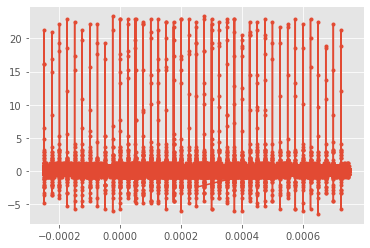

In [6]:
plt.plot(t,V_out,marker='.')

In [7]:
f = analysis_functions.av_frames(V_out,threshold=9,points=50)

In [8]:
Dt = (t[1] - t[0]) * 1e9
Dt

0.800001280010839

Text(0, 0.5, '$V_{out}$ (V)')

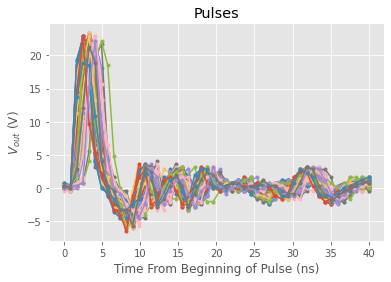

In [9]:
fig, ax = plt.subplots()
t_pulse = np.linspace(0, Dt * 50, 50)

for frame in f:
    ax.plot(t_pulse,frame,marker = '.')
    
ax.set_title('Pulses')
ax.set_xlabel('Time From Beginning of Pulse (ns)')
ax.set_ylabel(r'$V_{out}$ (V)')


In [10]:
jit = analysis_functions.av_dt(t,V_out,threshold=10)

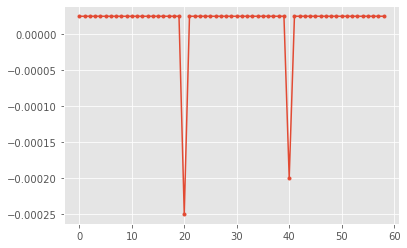

In [11]:
plt.plot(jit,marker='.')

In [12]:
sub_dirs

['30kHZ_14.4V_Circuit12_17',
 '40kHZ_14.0V_Circuit12_17',
 '50kHZ_14.0V_Circuit12_17',
 '40_kHz_R_47_Trig2_20',
 '80_kHz_R_47_Trig2_20',
 '30kHZ_14.8V_Circuit12_17',
 '30kHZ_15.2V_Circuit12_17',
 '30kHZ_15.6V_Circuit12_17',
 '35kHZ_14.0V_Circuit12_17',
 '45kHZ_14.0V_Circuit12_17',
 '30kHZ_13.6V_Circuit12_17',
 '30kHZ_13.2V_Circuit12_17',
 '30kHZ_12.8V_Circuit12_17']

In [13]:
data = np.load(os.path.join(os.path.join(base,sub_dirs[9]),'trial_1.npy'))

In [14]:
t = data[0]; V = data[1]

In [15]:
f = analysis_functions.av_frames(V)

In [16]:
dt = (t[1] - t[0]) * 1e09 
t_pulse = np.linspace(0,dt*100,100)

Text(0, 0.5, '$V_{out}$ (V)')

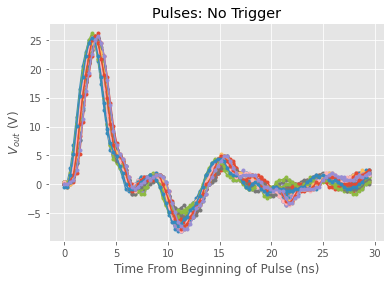

In [17]:
fig, ax = plt.subplots()
t_pulse = np.linspace(0, dt * 100, 100)

for frame in f:
    ax.plot(t_pulse,frame,marker = '.')
    
ax.set_title('Pulses: No Trigger')
ax.set_xlabel('Time From Beginning of Pulse (ns)')
ax.set_ylabel(r'$V_{out}$ (V)')



In [20]:
jit = analysis_functions.av_dt(t,V,threshold=15)

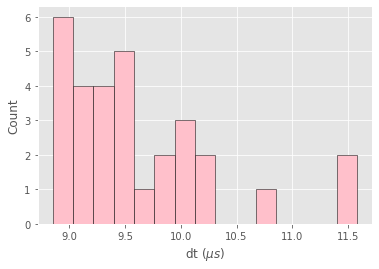

In [31]:
plt.hist(jit*1e6,bins=15,color='pink',edgecolor='black')
plt.ylabel('Count')
plt.xlabel(r'dt ($\mu s$)')
plt.savefig('Jitter_No_Trigger.png')